<a href="https://colab.research.google.com/github/yuji-matsunami/machine_learning/blob/main/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E5%8B%89%E5%BC%B7%E4%BC%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 線形回帰サンプル

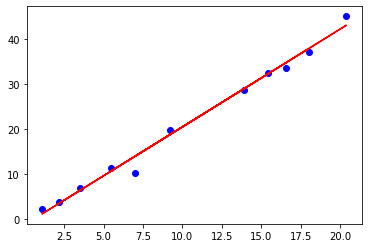

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 説明変数
X = [[3.5],[2.2],[20.4],[16.6],[7.0],[9.2],[13.9],[1.1],[18.0],[5.5],[15.4]]
# 目的変数
y = [6.8,3.8,45.0,33.5,10.3,19.7,28.7,2.2,37.1,11.4,32.5]

# model読みこみ
model = LinearRegression()
# 学習
model.fit(X,y)
plt.scatter(X, y, color='blue') # 説明変数と目的変数をプロットする
plt.plot(X, model.predict(X), color='red') # 回帰直線を引く

plt.show()


# 正則化サンプル

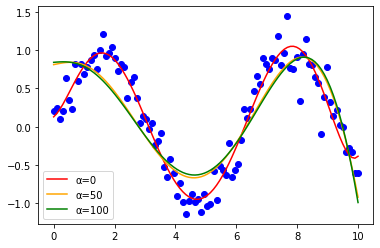

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures # べき乗の項を求めるのに用いる
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

"""
x_size = 20
x = np.random.uniform(low=0, high=1.5, size=x_size)
"""
x = np.linspace(0,10,100)
y = np.sin(x) + np.random.normal(0,0.2, 100)
ploy = PolynomialFeatures(6) # 6次式がつくれるように設定
x_ploy = ploy.fit_transform(x.reshape(100, 1))
model1 = Ridge(alpha=0)
model2 = Ridge(alpha=50)
model3 = Ridge(alpha=100)
model1.fit(x_ploy,y)
model2.fit(x_ploy,y)
model3.fit(x_ploy,y)
plt.scatter(x,y,color='blue')
plt.plot(x, model1.predict(x_ploy), color='red',label="α=0")
plt.plot(x, model2.predict(x_ploy), color='orange', label="α=50")
plt.plot(x, model3.predict(x_ploy), color='green', label="α=100")
plt.legend()
plt.show()


# シグモイド関数

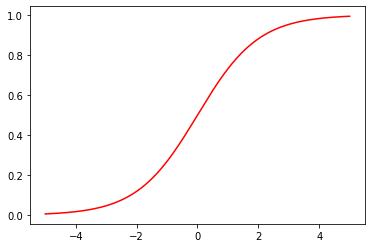

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-5,5,1000)
plt.plot(x, sigmoid(x), color='red')
plt.show()

# ロジスティック回帰

## 乳がん患者から採取した情報から悪性なのか良性なのか分類してみよう


        target
0    malignant
1    malignant
2    malignant
3    malignant
4    malignant
..         ...
564  malignant
565  malignant
566  malignant
567  malignant
568     benign

[569 rows x 1 columns]
     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         2

(0.02344, 0.3454)

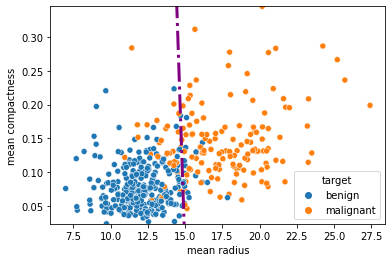

In [ ]:
from sklearn.datasets import load_breast_cancer # がんのデータセット
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression # ロジステック回帰

"""
ここからデータセットのロードをしています。
適当にデータ見てたりしているコードが並んでいます
今回は適当に特徴量を選んでいますが
本来はここでいろいろデータを見たりして良性と悪性の判断できそうな特徴量をみつける必要があります
例えばそれぞれの特徴量に対し、良性の平均と悪性の平均を比べてみたりなど
"""
data_breast_cancer = load_breast_cancer() # datast読み込み
label = pd.DataFrame(data_breast_cancer["target"], columns=["target"])
label = label.replace({0:data_breast_cancer["target_names"][0], 1:data_breast_cancer["target_names"][1]})
print(label)
x = pd.DataFrame(data_breast_cancer["data"], columns=data_breast_cancer["feature_names"])
print(x)
x_train,x_text, y_train, y_test = train_test_split(x, label, test_size=0.2) # ここでtrainデータとtestデータを分けている（今回はテストしてないから別に必要ないけど）
train = pd.concat([x_train, y_train], axis=1)
print(train.info())
sns.scatterplot(x='mean radius', y = "mean compactness", hue="target", data=train)
model = LogisticRegression()

# とりあえず「mean　radius」と「mean　compactness」で分類してみる
X = train[["mean radius","mean compactness"]]
clf = model.fit(X, train["target"]) # 学習

"""
ここから
決定境界の図示をしている
多分これはできなくてもよいと思う
僕も使ったことないし
"""
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
line_x = np.arange(np.min(train["mean radius"]) , np.max(train["mean radius"]))
line_y = - line_x * w1 / w2 - w0 / w2
plt.plot(line_x, line_y, linestyle='-.', linewidth=3, color='purple', label='kyoukai')
"""
ここまで
"""
plt.ylim([np.min(train["mean compactness"]) , np.max(train["mean compactness"]) ])


# サポートベクトルマシン

## 上と同じように決定境界を引いてみる

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(0.02344, 0.3454)

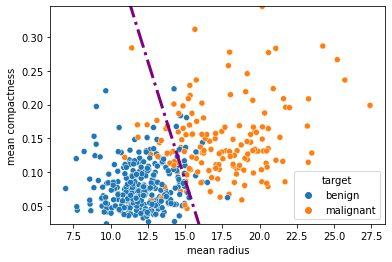

In [ ]:
from sklearn.svm import LinearSVC # svm
sns.scatterplot(x='mean radius', y = "mean compactness", hue="target", data=train)
model = LinearSVC() # modelのロード
clf = model.fit(X, train["target"]) # 学習(上で使ったデータをそのまま使っています)
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
line_x = np.arange(np.min(train["mean radius"]) , np.max(train["mean radius"]))
line_y = - line_x * w1 / w2 - w0 / w2
plt.plot(line_x, line_y, linestyle='-.', linewidth=3, color='purple', label='kyoukai')
plt.ylim([np.min(train["mean compactness"]) , np.max(train["mean compactness"]) ])

# サポートベクトルマシン（カーネル法）

## 決定境界が曲線になるデータを作ってみてカーネル法が正しく分類できることを確認してみましょう

0.9666666666666667

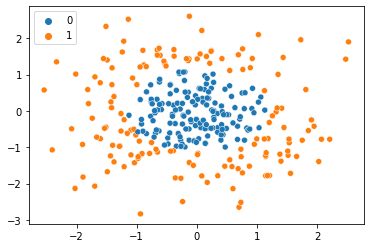

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import  make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# データを作る
X, y = make_gaussian_quantiles(n_features=2, n_classes=2, n_samples=300)
# データセットの分布をみてみる
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = SVC() # モデルの読み込み
model.fit(X_train, y_train) # 学習
y_pred = model.predict(X_test) # テストデータ（未知のデータで）予測する
accuracy_score(y_pred, y_test) # 精度を計算


# ナイーブベイズ

## scikit-learnに用意されているニュースのデータセットでテキスト分類してみる

## 用語の解説などは以下のページをみるとよいです

- [自然言語処理の初めの一歩！bag of words（BoW）を楽々入門](https://aizine.ai/glossary-bag-of-words/)

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
import pandas as pd

# データの取得
train_dataset = fetch_20newsgroups(subset="train")
test_dataset = fetch_20newsgroups(subset="test")

# データセットのプロパティを確認する
print(dir(train_dataset))

# ニュースのテキストをみてみる
print(train_dataset.data[0])

# データセットの数
print(len(train_dataset.data))
# 機械学習アルゴリズムは文字列のままだと使えないのでベクトルに変換する
# 今回はBoWという手法を使う
cv = CV()
# BoWの確認
# 単語の出現回数が文書ベクトルになっている
train_text = cv.fit_transform(train_dataset.data)
pd.DataFrame(train_text.toarray(), columns=cv.get_feature_names())

model = make_pipeline(CV(), MultinomialNB())
model.fit(train_dataset.data, train_dataset.target)

# 精度の確認(そこそこ分類できることが確認できると思います)
# 単語や文章のベクトル化手法を変えてみると精度が上がるかもしれません
y_pred = model.predict(test_dataset.data)
accuracy_score(y_pred, test_dataset.target)


['DESCR', 'data', 'filenames', 'target', 'target_names']
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





11314


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


0.7728359001593202

# ランダムフォレスト

## 3種類のワインに関するさまざまな計測値からランダムフォレストを用いて分類させてみる

In [ ]:
# まずは決定木を試してみる
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# データの読み込み
data = load_wine()
# データフレームにして中身をみる
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)
model = DecisionTreeClassifier()
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_pred,y_test)

0.9722222222222222

[Text(167.4, 199.32, 'X[12] <= 730.0\ngini = 0.648\nsamples = 142\nvalue = [49, 60, 33]'),
 Text(83.7, 163.07999999999998, 'X[6] <= 1.225\ngini = 0.465\nsamples = 85\nvalue = [1, 55, 29]'),
 Text(41.85, 126.83999999999999, 'X[9] <= 3.56\ngini = 0.133\nsamples = 28\nvalue = [0, 2, 26]'),
 Text(20.925, 90.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(62.775000000000006, 90.6, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 26]'),
 Text(125.55000000000001, 126.83999999999999, 'X[11] <= 1.53\ngini = 0.132\nsamples = 57\nvalue = [1, 53, 3]'),
 Text(104.625, 90.6, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(146.475, 90.6, 'X[0] <= 13.175\ngini = 0.036\nsamples = 54\nvalue = [1, 53, 0]'),
 Text(125.55000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 51\nvalue = [0, 51, 0]'),
 Text(167.4, 54.359999999999985, 'X[0] <= 13.365\ngini = 0.444\nsamples = 3\nvalue = [1, 2, 0]'),
 Text(146.475, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(188.32500000000

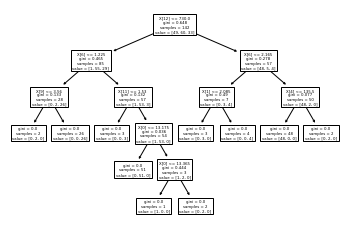

In [ ]:
# 決定木の可視化をしてみる
from sklearn import tree
tree.plot_tree(model)

In [ ]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# データの読み込み
data = load_wine()
# データの中身を確認
df = pd.DataFrame(data.data, columns=data.feature_names)
df


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
# データセットの分割
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2) 

# モデルの読み込み
model = RandomForestClassifier()
# 学習
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# 評価
accuracy_score(y_pred, y_test)

1.0

# パーセプトロン

## ここでは手書き文字の分類のデータセットを用いて試してみる

データの数: 115008
一番目のデータの形: 64
１番目のデータ [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


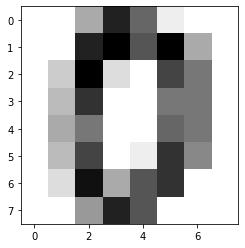

In [ ]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# データ読み込み
digits = load_digits()

# データの中身確認
data = digits.data
target = digits.target
print("データの数:", data.size)
print("一番目のデータの形:", data[0].size)
print("１番目のデータ", data[0])

# わかりにくいから可視化してみる
plt.imshow(digits.images[0],cmap=plt.cm.gray_r)


In [ ]:
# データの分割
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
# モデルのロード
model = MLPClassifier(hidden_layer_sizes=(16,),max_iter=1000)
# 学習
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
# 評価
accuracy_score(y_pred, y_test)

0.9638888888888889

# 主成分分析

## 4つの特徴量を2次元に削減して可視化してみる

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


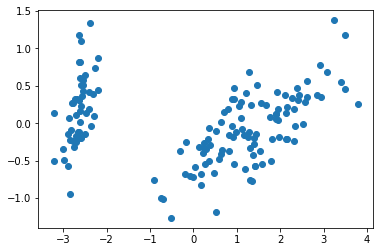

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd


data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df)
# 削減後の次元数を設定
n_components = 2

# modelをロード
model = PCA(n_components=n_components)
model = model.fit(data.data)

feature = model.transform(data.data)
plt.scatter(feature[:,0], feature[:,1])


# LSA

## 以下の文について考えてみる

1. 自動車で大学に行く
2. 車で旅行に行く
3. テレビでバラエティーを見る
4. テレビでドラマを見る

## 単語を出現回数で数値に変換

||文1|文２|文３|文４|
|:--:|:--:|:--:|:--:|:--:|
|自動車|1|0|0|0|
|大学|1|0|0|0|
|行く|1|1|0|0|
|車|0|1|0|0|
|旅行|0|1|0|0|
|テレビ|0|0|1|1|
|バラエティー|0|0|1|0|
|見る|0|0|1|1|
|ドラマ|0|0|0|1|

## この表を基にPythonでLSAをやってみる


In [ ]:
from sklearn.decomposition import TruncatedSVD

data = [[1,0,0,0],
        [1,0,0,0],
        [1,1,0,0],
        [0,1,0,0],
        [0,1,0,0],
        [0,0,1,1],
        [0,0,1,0],
        [0,0,1,1],
        [0,0,0,1]]

n_components = 2 # 潜在変数の数
model = TruncatedSVD(n_components=n_components)
# 学習
model.fit(data)

# 変形したデータ
print(model.transform(data))
# 累積寄与率(変更後の行列がもとの情報をどれだけ持っているか)
print(sum(model.explained_variance_ratio_))


[[ 0.00000000e+00  7.07106781e-01]
 [ 0.00000000e+00  7.07106781e-01]
 [-5.43895982e-16  1.41421356e+00]
 [-5.43895982e-16  7.07106781e-01]
 [-5.43895982e-16  7.07106781e-01]
 [ 1.41421356e+00  5.43895982e-16]
 [ 7.07106781e-01  2.71947991e-16]
 [ 1.41421356e+00  5.43895982e-16]
 [ 7.07106781e-01  2.71947991e-16]]
0.6249999999999998


# LDA

## 20 Newsgroups というデータセットを用いてトピックモデルの作成を行う

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

data = fetch_20newsgroups()
print(data.data[0])
# 本文以外は邪魔なので取り除く
data = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))
print('-----変更後-----')
print(data1.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





-----変更後-----
I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from th

In [ ]:
tf_vectorizer = CountVectorizer(max_features=1000,stop_words="english")
tf = tf_vectorizer.fit_transform(data.data)

n_topics = 20
model = LatentDirichletAllocation(n_components=n_topics, max_iter=50)
model.fit(tf)

LatentDirichletAllocation(max_iter=50, n_components=20)

In [ ]:
feature_names = np.array(tf_vectorizer.get_feature_names())
for i,component in enumerate(model.components_):
    print(f"coponent:{i}")
    idx = component.argsort()[::-1][:5]
    for j in idx:
        print(feature_names[j], component[j])

coponent:0
encryption 539.8368803328146
use 477.8919728650715
key 412.1790962383253
public 405.90249867057906
government 373.03407454007544
coponent:1
key 795.5549256852845
db 619.9859032967482
chip 343.01055208598376
bit 301.92432789945315
number 259.3607149892524
coponent:2
game 807.153914212887
year 749.9473822734359
team 742.5273596654703
games 532.8094760099975
season 443.4229372845876
coponent:3
gun 714.049999995964
people 660.1475295450629
state 562.445876862214
government 550.1325324889306
israel 537.1953793994213
coponent:4
file 1059.3803415340758
window 732.4029830230207
program 720.4734729002383
use 652.885958766457
files 476.55532960882147
coponent:5
god 1952.1084486091115
jesus 886.0142072056436
people 878.6074645218258
does 769.9939423243529
believe 690.8424300148117
coponent:6
car 799.0499999947191
price 521.5863383999649
sale 339.5028299952715
offer 327.02906974414225
new 325.0642709027278
coponent:7
dos 672.923709492809
windows 570.9196264772918
file 464.9220777131899


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# k-means法

## アイリスデータセットを用いてクラスタリングを行う


In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# データセットの読み込みと確認
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


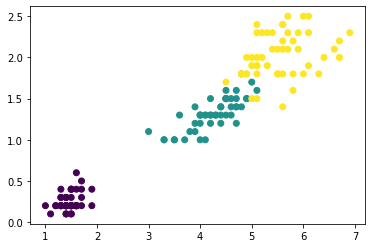

In [ ]:
# 正解データを用いてクラスの分布を確認してみる
plt.scatter(data.data[:,2], data.data[:,3],c=data.target)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


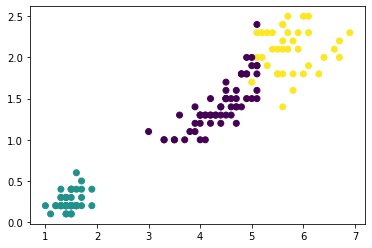

In [ ]:
n_clusters = 3 # クラスタ数を3にする
model = KMeans(n_clusters=n_clusters)
model = model.fit(data.data)
print(model.labels_)
colors = ['r', 'b', 'g']
# 結果を可視化
plt.scatter(data.data[:,2], data.data[:,3], c=model.labels_ )

# 混合ガウスモデル

- ガウス分布のグラフを作成
- 適当にデータ作って図示してみる
- アイリスデータで確認(k-meansと比べてみる)

In [ ]:
import numpy as np

x = np.arange(-8,8,0.01)
# 定数
SIGMA = 0.4
MUU = 0

y = (1 / np.sqrt())


600


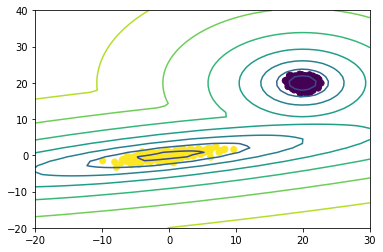

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

n_samples = 300
np.random.seed(0) # 乱数を固定
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20,20]) # 正規分布の乱数配列を生成してちょっとずらす
print(shifted_gaussian.size)

C = np.array([[0.0,-0.7], [3.5, 0.7]])
streched_gaussian = np.dot(np.random.randn(n_samples, 2), C) # 正規分布の乱数配列に生成したやつに掛け算をして変形させる

X_train = np.vstack([shifted_gaussian, streched_gaussian]) # 生成した配列をつなげてデータセットにする
# モデルのロードと学習
clf = mixture.GaussianMixture(n_components=2, covariance_type="full")
clf.fit(X_train)

x = np.linspace(-20, 30)
y = np.linspace(-20, 40)
X, Y = np.meshgrid(x, y)
point = np.array([X.ravel(), Y.ravel()]).T
Z = - clf.score_samples(point)
Z = Z.reshape(X.shape)
cs = plt.contour(X,Y,Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
plt.scatter(X_train[:,0], X_train[:,1], c = clf.predict(X_train))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: Log scale: values of z <= 0 have been masked


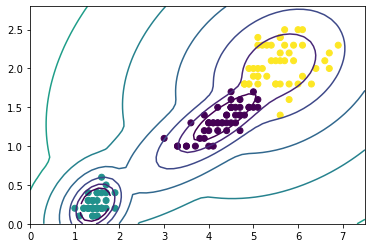

In [ ]:
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np

data = load_iris()
n_components = 3
model = GaussianMixture(n_components=n_components)
model.fit(data.data[:,2:4])

"""
#
#ここからガウス分布の等高線を引いてみる
#
"""
# 適当にデータが収まるくらいの数列を生成
x = np.linspace(0., 7.5)
y = np.linspace(0., 2.8)
#　それぞれの数列の格子点を作成しpointにまとめる
X, Y = np.meshgrid(x,y)
point = np.array([X.ravel(), Y.ravel()]).T
Z = - model.score_samples(point)
Z = Z.reshape(X.shape)
cs = plt.contour(X,Y,Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0,3,10))
plt.scatter(data.data[:,2], data.data[:,3], c=model.predict(data.data[:,2:4]))